### Import libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
import seaborn as sns

%matplotlib inline

### Import the data

In [27]:
bicimad = pd.read_csv("bicimad.csv")

### What's in there?

In [20]:
bicimad.head()  # prints first 5 rows

,date,year_subs_trips,temp_subs_trips
0,2014-06-23,17,79
1,2014-06-24,24,48
2,2014-06-25,105,14
3,2014-06-26,120,15
4,2014-06-27,131,18


In [40]:
bicimad.tail()  # prints last 5 rows

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend
2013,2019-12-27,6387,0,2019,12,4,False
2014,2019-12-28,5058,0,2019,12,5,True
2015,2019-12-29,4616,0,2019,12,6,True
2016,2019-12-30,5772,0,2019,12,0,False
2017,2019-12-31,5270,0,2019,12,1,False


In [48]:
bicimad.sample(n=5)  # prints random sample of n rows

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend
158,2014-11-28,2133,0,2014,11,4,False
961,2017-02-08,7163,19,2017,2,2,False
164,2014-12-04,4546,9,2014,12,3,False
173,2014-12-13,2676,23,2014,12,5,True
1368,2018-03-22,9451,79,2018,3,3,False


In [49]:
bicimad.dtypes  # prints the type of data contained in each column

date               datetime64[ns]
year_subs_trips             int64
temp_subs_trips             int64
year                        int64
month                       int64
weekday                     int64
weekend                      bool
dtype: object

In [21]:
bicimad.columns  # names of the columns

Index(['date', 'year_subs_trips', 'temp_subs_trips'], dtype='object')

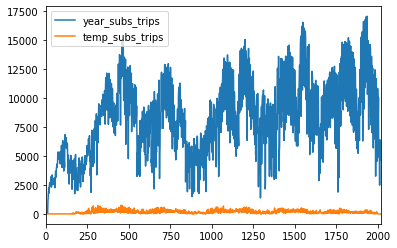

In [22]:
bicimad.plot()  # uses matplotlib.pyplot to plot 

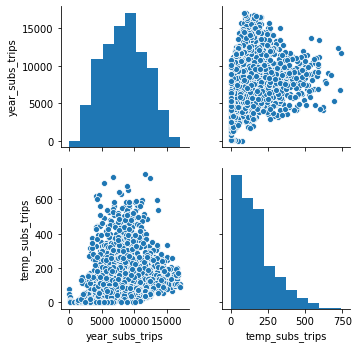

In [24]:
sns.pairplot(bicimad.iloc[:, 1:])  # useful plot from seaborn to get an idea of how the data looks like

### Process data a bit

In [29]:
bicimad["date"] = pd.to_datetime(bicimad["date"])  # convert date from string to date

In [31]:
bicimad.dtypes

date               datetime64[ns]
year_subs_trips             int64
temp_subs_trips             int64
dtype: object

In [85]:
# create some time related variables

bicimad["year"] = bicimad["date"].map(lambda x: x.year)
bicimad["month"] = bicimad["date"].map(lambda x: x.month)
bicimad["day"] = bicimad["date"].map(lambda x: x.day)
bicimad["weekday"] = bicimad["date"].map(lambda x: x.weekday())
bicimad["weekend"] = np.where(bicimad["weekday"] < 5, False, True)

In [86]:
bicimad.dtypes

date               datetime64[ns]
year_subs_trips             int64
temp_subs_trips             int64
year                        int64
month                       int64
weekday                     int64
weekend                      bool
day                         int64
season                     object
dtype: object

In [87]:
bicimad.head()

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend,day,season
0,2014-06-23,17,79,2014,6,0,False,23,summer
1,2014-06-24,24,48,2014,6,1,False,24,summer
2,2014-06-25,105,14,2014,6,2,False,25,summer
3,2014-06-26,120,15,2014,6,3,False,26,summer
4,2014-06-27,131,18,2014,6,4,False,27,summer


### Slicing

In [50]:
# trips during weekends

bicimad.query("weekend == True")

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend
5,2014-06-28,101,18,2014,6,5,True
6,2014-06-29,107,33,2014,6,6,True
12,2014-07-05,783,3,2014,7,5,True
13,2014-07-06,1230,5,2014,7,6,True
19,2014-07-12,1949,4,2014,7,5,True
...,...,...,...,...,...,...,...
2001,2019-12-15,6714,1,2019,12,6,True
2007,2019-12-21,5353,0,2019,12,5,True
2008,2019-12-22,4891,0,2019,12,6,True
2014,2019-12-28,5058,0,2019,12,5,True


In [52]:
# trips on Mondays during July 2017
bicimad[
    (bicimad["year"] == 2017) &
    (bicimad["month"] == 7) &
    (bicimad["weekday"] == 0)
]

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend
1106,2017-07-03,11905,256,2017,7,0,False
1113,2017-07-10,11684,289,2017,7,0,False
1120,2017-07-17,11127,193,2017,7,0,False
1127,2017-07-24,10956,136,2017,7,0,False
1134,2017-07-31,9759,258,2017,7,0,False


In [ ]:
# only year_subs_trips, date, weekend

### Filter the data

Filter:
* between 2015 and 2018
* Monday to Thursday
* summer

In [91]:
# we need a function to extract season from date
def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
bicimad["season"] = bicimad["date"].map(get_season)

In [94]:
bicimad.sample(4)  # boom

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend,day,season
793,2016-08-24,9040,189,2016,8,2,False,24,summer
1225,2017-10-30,12391,269,2017,10,0,False,30,fall
276,2015-03-26,6068,96,2015,3,3,False,26,spring
828,2016-09-28,8299,67,2016,9,2,False,28,fall


In [95]:
# now we can work on our filters

year_filter = range(2015, 2019)
weekday_filter = range(4)
season_filter = "summer"

# filter time
bicimad[
    (bicimad["year"].isin(year_filter)) &
    (bicimad["weekday"].isin(weekday_filter)) &
    (bicimad["season"]=="summer") 
]

,date,year_subs_trips,temp_subs_trips,year,month,weekday,weekend,day,season
364,2015-06-22,9903,183,2015,6,0,False,22,summer
365,2015-06-23,9334,148,2015,6,1,False,23,summer
366,2015-06-24,11459,179,2015,6,2,False,24,summer
367,2015-06-25,12147,182,2015,6,3,False,25,summer
371,2015-06-29,9721,141,2015,6,0,False,29,summer
...,...,...,...,...,...,...,...,...,...
1543,2018-09-13,16189,196,2018,9,3,False,13,summer
1547,2018-09-17,14316,208,2018,9,0,False,17,summer
1548,2018-09-18,15149,120,2018,9,1,False,18,summer
1549,2018-09-19,16313,140,2018,9,2,False,19,summer


### Grouping

In [101]:
# mean number of trips per weekday
# Which is the day with historically more trips on average?

bicimad.groupby("weekday").sum()

,year_subs_trips,temp_subs_trips,year,month,weekend,day
weekday,,,,,,
0,2439125,38465,582830,1963,0.0,4549
1,2653922,32126,582831,1960,0.0,4565
2,2715337,30412,580812,1957,0.0,4549
3,2739448,33624,580813,1954,0.0,4563
4,2631026,41239,580814,1953,0.0,4516
5,2055113,75091,580814,1961,288.0,4559
6,1885547,77397,580815,1959,288.0,4544


In [100]:
# total number of trips per month per year

bicimad.groupby(["year", "month"]).sum()

year_subs_trips  temp_subs_trips  weekday  weekend  day
year month                                                         
2014 6                  726              241       21      2.0  212
     7                65388              128       90      8.0  496
     8                98331               91       99     10.0  496
     9               149826               87       85      8.0  465
     10              176350               71       93      8.0  496
...                     ...              ...      ...      ...  ...
2019 8               267100             4233       96      9.0  496
     9               399407             4108       90      9.0  465
     10              413995             4422       90      8.0  496
     11              301768             2459       93      9.0  465
     12              219790              653       91      9.0  496

[67 rows x 5 columns]

In [107]:
# aggregating features with functions
# calculate average, min, max of trips per month

(
    bicimad
    .groupby("month")
    .agg({
        "year_subs_trips": [np.mean, max, min],
        "temp_subs_trips": [np.mean, max, min]
    })
)

year_subs_trips              temp_subs_trips         
                 mean    max   min            mean  max min
month                                                      
1         6290.296774  11473  1379       93.722581  402   7
2         7045.517730  12246  1929      109.340426  397   7
3         7358.845161  12735  1853      150.509677  563   5
4         7991.173333  13592  1881      205.966667  696   4
5         9902.741935  14865  3054      269.148387  732  34
6        10817.639241  15206    17      209.753165  570  14
7         9202.510753  14480    85      175.612903  468   0
8         7553.112903  12835  2254      191.908602  475   0
9        10863.133333  16736  4008      183.427778  745   0
10        9900.446237  17054  1917      159.715054  595   0
11        7959.838889  13589  1502      105.250000  577   0
12        6567.370968  11677  1740      103.758065  503   0

In [108]:
# calculate sum and median of trips per year and month
(
    bicimad
    .groupby(["year", "month"])
    .agg({
        "year_subs_trips": [sum, np.median],
        "temp_subs_trips": [sum, np.median],
    })
)

year_subs_trips          temp_subs_trips       
                       sum   median             sum median
year month                                                
2014 6                 726    106.0             241   18.0
     7               65388   2359.0             128    4.0
     8               98331   3048.0              91    3.0
     9              149826   4977.0              87    2.0
     10             176350   5946.0              71    2.0
...                    ...      ...             ...    ...
2019 8              267100   8811.0            4233  130.0
     9              399407  14462.5            4108  126.5
     10             413995  14166.0            4422  107.0
     11             301768  10718.0            2459   61.0
     12             219790   6387.0             653    1.0

[67 rows x 4 columns]